In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CVD.csv')

In [3]:
df=data

In [4]:
for i in df.columns:
    print(i)

General_Health
Checkup
Exercise
Heart_Disease
Skin_Cancer
Other_Cancer
Depression
Diabetes
Arthritis
Sex
Age_Category
Height_(cm)
Weight_(kg)
BMI
Smoking_History
Alcohol_Consumption
Fruit_Consumption
Green_Vegetables_Consumption
FriedPotato_Consumption


In [5]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


Now, from below we can check that there are no null values in the dataframe.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

### There are no no null values in the dataset. Also, there are 12 catogerical features and 7 numerical features.

In [7]:
# finding if there are any duplicate rows in the data
duplicated_mask= df.duplicated()
duplicates=df[duplicated_mask]
# print(type(duplicates))
print("shape of duplicate rows and columns", duplicates.shape)
# df.drop_duplicates()
print("duplicate rows have not been dropped because They are instances of the data collected from studies where more than one instance can exist of the same type of data")

shape of duplicate rows and columns (80, 19)
duplicate rows have not been dropped because They are instances of the data collected from studies where more than one instance can exist of the same type of data


In [8]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [9]:
# numerical_features = df.select_dtypes(include=['int64', 'float64'])

# fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 4))

# # Loop through the numerical features and create histograms
# for i, feature in enumerate(numerical_features):
#     df[feature].plot(kind='hist', ax=axes[i], title=feature)
#     axes[i].set_xlabel(feature)

# plt.show()

In [10]:
# sns.set()
# sns.pairplot(data , hue="Heart_Disease")
# plt.show()

### ENCODING DATA

In [11]:
catogerical_features = ['General_Health','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']

In [12]:
for i in catogerical_features:
#     print( "feature -  " , i )
    print()
    print(data[i].value_counts())
    print()


Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64


Yes    239381
No      69473
Name: Exercise, dtype: int64


No     283883
Yes     24971
Name: Heart_Disease, dtype: int64


No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64


No     278976
Yes     29878
Name: Other_Cancer, dtype: int64


No     246953
Yes     61901
Name: Depression, dtype: int64


No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64


No     207783
Yes    101071
Name: Arthritis, dtype: int64


Female    160196
Male      148658
Name: Sex, dtype: int64


65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    1

Here, <b>General_Health</b> has <b> ordinal values</b> refer to data that has a specific order or ranking but doesn't have an equal interval between values. for eg- "Good" "Very Good" and "Excelent" represent ordinal data because they imply an order, but the health difference between "Good" and "Very Good" doesn't necessarily match the difference between "Very Good" and "Excelent".
Inferences- 
1. General_Health has 5 types and has ordinal values so we need to label encode so that the ordinal information is preserved.
2. Diabetes where 'No, pre-diabetes or borderline diabetes' and 'Yes, but female told only during pregnancy' is there, we can now either delete this rows or do consider it 'Yes' or 'No' respectively.
3. Sex has 'Male' or 'Female'.
4. Age_Category shows the Age Range of Patient.
5. Other columns have either 'Yes' or 'No' as values

Now, encoding all these features

In [13]:
# columns with yes, no values that neet to be encoded
cols_prep = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History'] 

In [14]:
data[cols_prep] = data[cols_prep].replace({
    'Yes':1,
    'No':0
})

data[cols_prep]

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Smoking_History
0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0
308850,1,0,0,0,0,0,0
308851,1,0,0,0,1,0,1
308852,1,0,0,0,0,0,0


In [15]:
data['General_Health'] = data['General_Health'].replace({
    'Very Good':5,
    'Good':4,
    'Excellent':3,
    'Fair':2,
    'Poor':1
})

In [16]:
data['General_Health'].value_counts()

5    110395
4     95364
3     55954
2     35810
1     11331
Name: General_Health, dtype: int64

In [17]:
data['Sex'] = data['Sex'].replace({
    'Male':0,
    'Female':1
})

In [18]:
data['Sex'].value_counts()

1    160196
0    148658
Name: Sex, dtype: int64

In [19]:
data['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

In [20]:
data['Checkup'] = data['Checkup'].replace({
    'Never':0,
    'Within the past year':1,
    'Within the past 2 years':2,
    'Within the past 5 years':3,
    '5 or more years ago':4
})

data['Checkup'].value_counts()

1    239371
2     37213
3     17442
4     13421
0      1407
Name: Checkup, dtype: int64

In [21]:
data['Age_Category'].value_counts()

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64

In [22]:
data['Age_Category'] = data['Age_Category'].replace({
    '80+':'80-100'
})

In [23]:
new_columns = data['Age_Category'].str.split('-', expand=True) #splits the column into two columns in a separate dataframe new_columns
# print(new_columns)
new_columns.columns = ['Age_min','Age_max'] #renaming the columns
new_columns = new_columns.astype(int)
data = pd.concat([data, new_columns], axis=1)
data = data.drop(['Age_Category'], axis=1)
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,No,1,1,150,32.66,14.54,1,0,30,16,12,70,74
1,5,1,0,1,0,0,0,Yes,0,1,165,77.11,28.29,0,0,30,0,4,70,74
2,5,1,1,0,0,0,0,Yes,0,1,163,88.45,33.47,0,4,12,3,16,60,64
3,1,1,1,1,0,0,0,Yes,0,0,180,93.44,28.73,0,0,30,30,8,75,79
4,4,1,0,0,0,0,0,No,0,0,191,88.45,24.37,1,0,8,4,0,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,5,1,1,0,0,0,0,No,0,0,168,81.65,29.05,0,4,30,8,0,25,29
308850,2,3,1,0,0,0,0,Yes,0,0,180,69.85,21.48,0,8,15,60,4,65,69
308851,5,4,1,0,0,0,1,"Yes, but female told only during pregnancy",0,1,157,61.23,24.69,1,4,40,8,4,30,34
308852,5,1,1,0,0,0,0,No,0,0,183,79.38,23.73,0,3,30,12,0,65,69


In [24]:
data['Diabetes'].value_counts()

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

In [31]:
# we will create two databases where the person doesnt really has diabetes but is either pre-diabetes or a female during pregnancy 
# as the results maybe different for a heart disease in these cases

# data_no_abnormal_diabetes dataframe only considers the data with values for simple Yes or No
data_no_abnormal_diabetes=data.copy()
# only takes rows with values for Diabetes as yes or no, removes all the rows with abnormal value for diabetes
data_no_abnormal_diabetes = data_no_abnormal_diabetes[~data_no_abnormal_diabetes['Diabetes'].isin(['No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy'])]

print('Before')
display(data_no_abnormal_diabetes['Diabetes'].value_counts())

# Encoding
data_no_abnormal_diabetes['Diabetes'] = data_no_abnormal_diabetes['Diabetes'].replace({
    'Yes':1,
    'No':0
})
data_no_abnormal_diabetes['Diabetes'].value_counts()

Before


No     259141
Yes     40171
Name: Diabetes, dtype: int64

0    259141
1     40171
Name: Diabetes, dtype: int64

In [32]:
# data after taking into consideration the abnormal value for diabetes('Yes, but female told only during pregnancy' ,
# 'No, pre-diabetes or borderline diabetes')
data_abnormal_diabetes = data.copy()
data_abnormal_diabetes['Diabetes'] = data_abnormal_diabetes['Diabetes'].replace({
    'Yes, but female told only during pregnancy':1,
    'No, pre-diabetes or borderline diabetes':0,
    'Yes':1,
    'No':0
})

data_abnormal_diabetes['Diabetes'].value_counts()

0    266037
1     42817
Name: Diabetes, dtype: int64

Now, we have two datasets one in which we consider the values for diabetes ( 'Yes, but female told only during pregnancy' , 'No, pre-diabetes or borderline diabetes' ) and the other where we drop these values for the diabetes feature.

In [34]:
data_no_abnormal_diabetes.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,0,1,1,150,32.66,14.54,1,0,30,16,12,70,74
1,5,1,0,1,0,0,0,1,0,1,165,77.11,28.29,0,0,30,0,4,70,74
2,5,1,1,0,0,0,0,1,0,1,163,88.45,33.47,0,4,12,3,16,60,64
3,1,1,1,1,0,0,0,1,0,0,180,93.44,28.73,0,0,30,30,8,75,79
4,4,1,0,0,0,0,0,0,0,0,191,88.45,24.37,1,0,8,4,0,80,100


In [35]:
data_abnormal_diabetes.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,0,1,1,150,32.66,14.54,1,0,30,16,12,70,74
1,5,1,0,1,0,0,0,1,0,1,165,77.11,28.29,0,0,30,0,4,70,74
2,5,1,1,0,0,0,0,1,0,1,163,88.45,33.47,0,4,12,3,16,60,64
3,1,1,1,1,0,0,0,1,0,0,180,93.44,28.73,0,0,30,30,8,75,79
4,4,1,0,0,0,0,0,0,0,0,191,88.45,24.37,1,0,8,4,0,80,100


## Exploratory Data Analysis

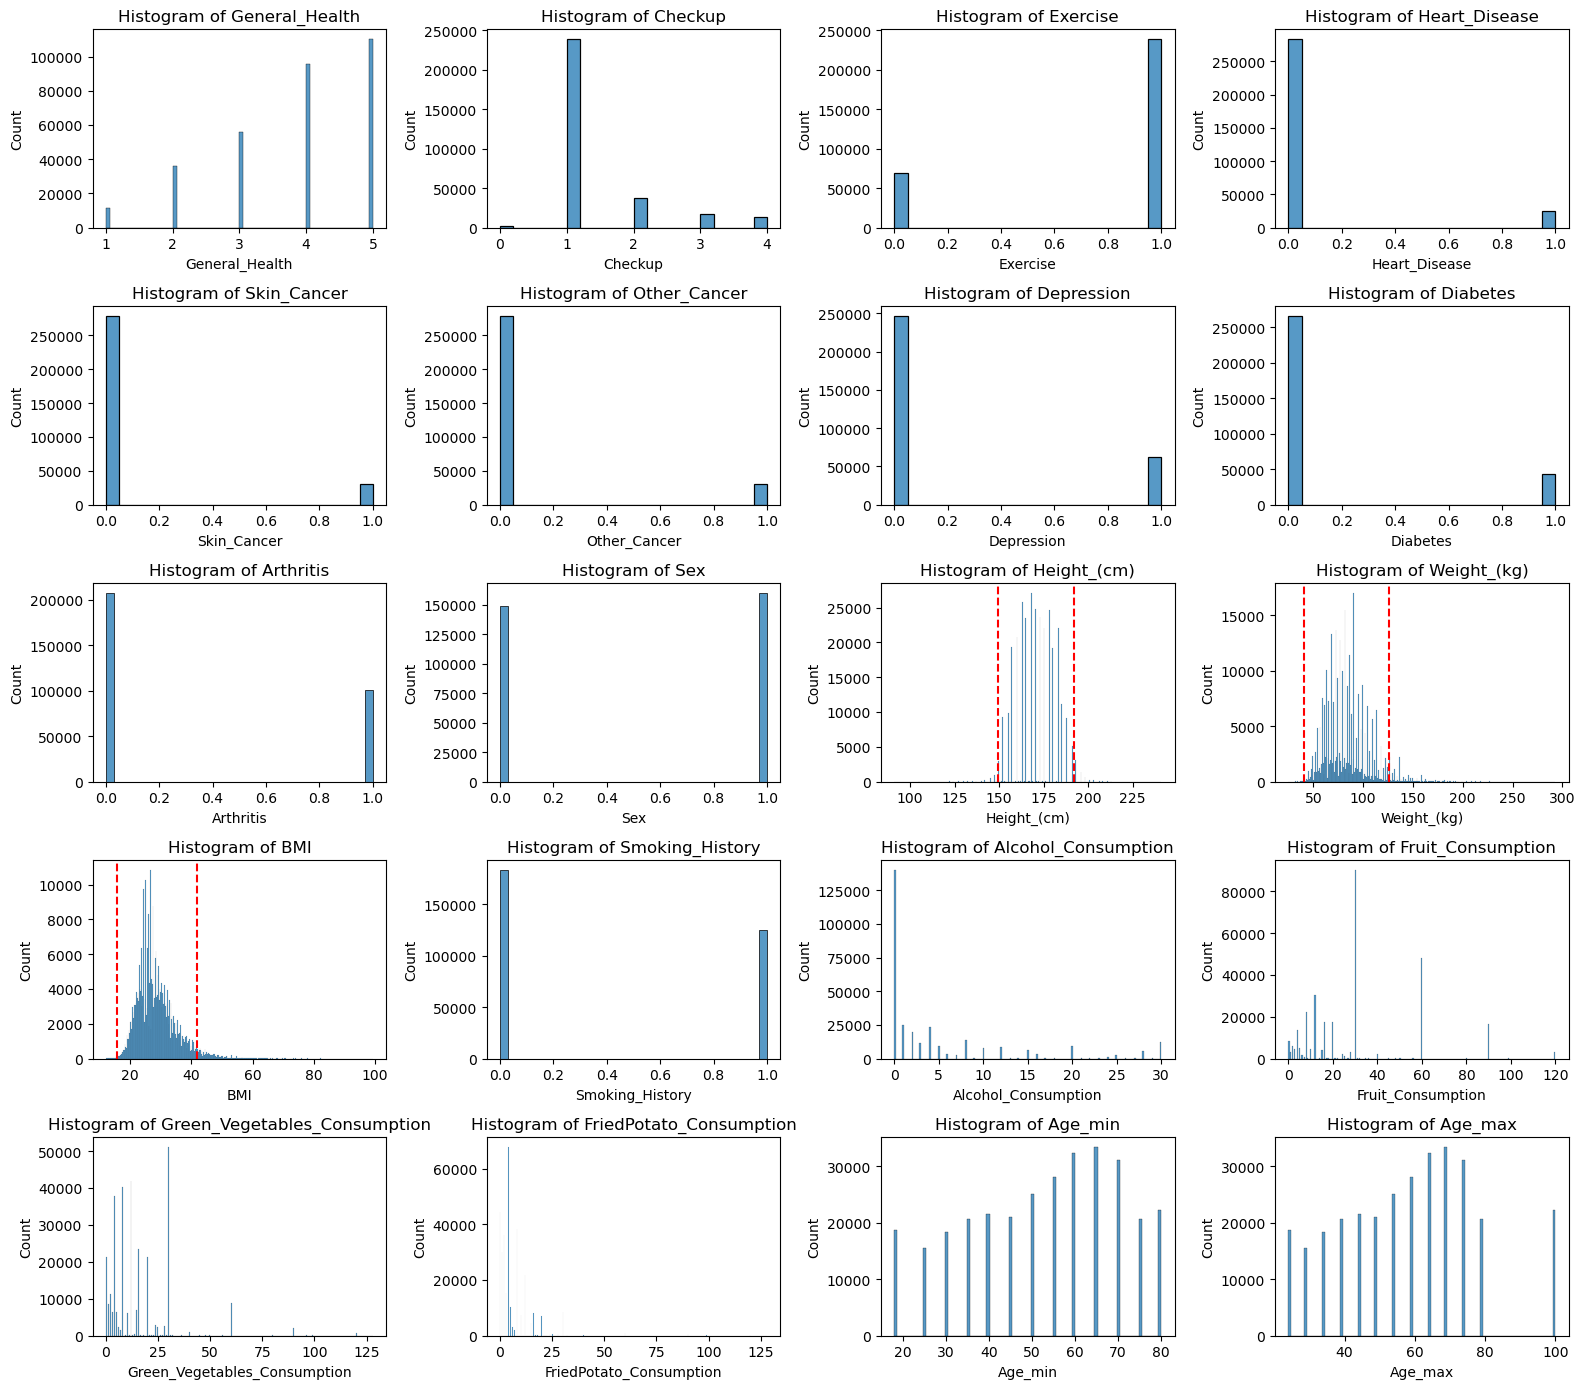

In [40]:
fig, axes = plt.subplots(5, 4, figsize=(16, 14))
# This line creates a figure (fig) with a grid of subplots organized in a 4x5 matrix. 
# axes is a 2D array containing references to each subplot.
# 
for col, ax in zip(data_abnormal_diabetes, axes.flatten()):
    
    if col in ['Height_(cm)', 'Weight_(kg)', 'BMI']:
        mean = data_abnormal_diabetes[col].mean()
        std = data_abnormal_diabetes[col].std()
        # Computes the lower bound and upper bound for potential outliers (mean - 2 * standard deviations).
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std

        # plots a vertical line for the lower bound and upper bound for potential outliers.
        ax.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
        ax.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
    
    # Plot histogram in the current subplot
    sns.histplot(data=data_abnormal_diabetes, ax=ax, x=col)
    
    # Set labels and title for the current subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {col}')
#     ax.legend()

# Adjusts the spacing between subplots to prevent overlapping and improve layout.
plt.tight_layout()
plt.show()

In [42]:
# in order to remove the outliers in height, weight, BMI features
data_train_normal = data_abnormal_diabetes.copy()
data_train_abnormal = data_no_abnormal_diabetes.copy()
    
lower_percentile = 5
upper_percentile = 95

# Perform quantile capping on data_train_dia
lower_bound_normal= data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_normal = data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data_train_normal[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_normal, upper_bound_normal, axis=1)

# Perform quantile capping on data_train_no_dia
lower_bound_abnormal = data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_abnormal = data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data_train_abnormal[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_abnormal, upper_bound_abnormal, axis=1)

## KdePlots

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20,20))

for col, ax in zip(data_abnormal_diabetes, axes.flatten()):
    sns.kdeplot(data=data_abnormal_diabetes, ax=ax, x=col)